# Practice 20

# Hough TRansform and Contours and Videos

# Exercise 1

![Alt text](20230523_082333.jpg)

# Exercise 2

### import part

In [1]:
import cv2 as cv

import matplotlib.pyplot as plt
import numpy as np

In [2]:
def image_plot (img , width =6 , hight = 8 , c_map='gray' , title = 'image', vmin=0 , vmax=255):
    plt.figure(figsize=(hight,width),dpi=100)
    plt.axis('off')
    plt.imshow(img, cmap=c_map, vmin=vmin, vmax=vmax)
    plt.title(title)
    plt.show()

In [3]:
def display_hist_bins(img, bins = 256, range=(0,256), title = 'histogram'):
    plt.figure(figsize= (6,4) , dpi=100)
    plt.hist(img.flat , bins , range)
    plt.title(title)
    plt.show()

In [4]:
def show_multiple_img(row, columns, img, vmin=0, vmax=255):
    fig = plt.figure(figsize=(15,17),dpi=100)
    for i in range(len(img)):
        fig.add_subplot(row, columns, i+1)
        plt.imshow (img[i],cmap='gray', vmin=vmin , vmax = vmax)
        plt.axis('off')
        plt.title('img'+str(i))

## Read Image

In [5]:
org_img = cv.imread(r'media/a.jpg',cv.IMREAD_UNCHANGED)
org_img_main = org_img.copy()

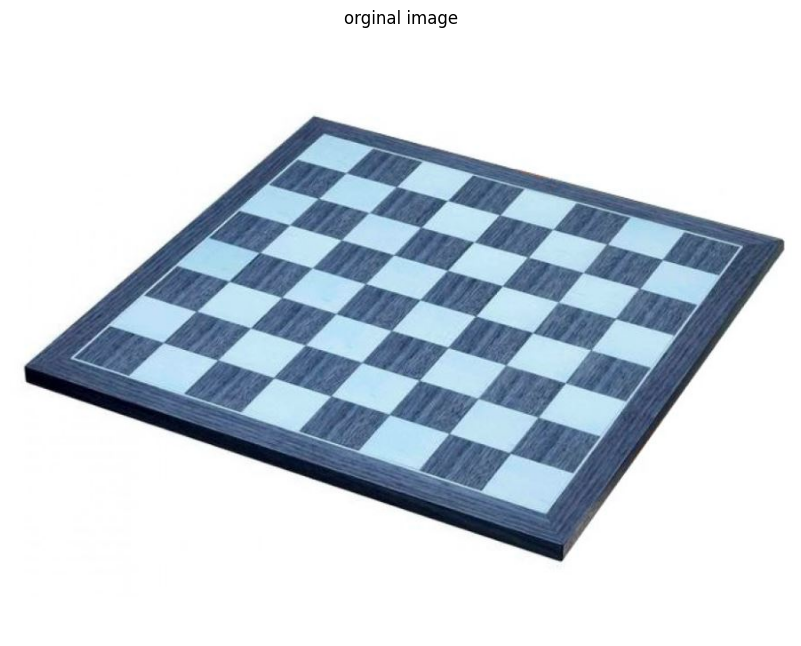

In [6]:
image_plot(org_img,width = 8, hight = 12 , title = 'orginal image')

### Edge detection through Canny

In [7]:
img_gray = cv.cvtColor(org_img,cv.COLOR_BGR2GRAY)

threshold = 150
ret, img_thresh = cv.threshold(img_gray,threshold,255,cv.THRESH_BINARY)
img_canny = cv.Canny(img_thresh,100, 120,3)

# img_canny = cv.Canny(org_img,100, 120,3)

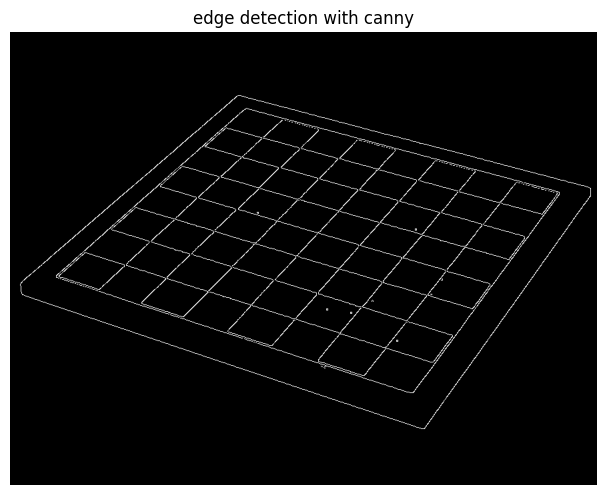

In [8]:
#show image
image_plot(img_canny, title= 'edge detection with canny')

## Using Hough Transform

In [9]:
lines = cv.HoughLines(img_canny,1,np.pi/180,150)

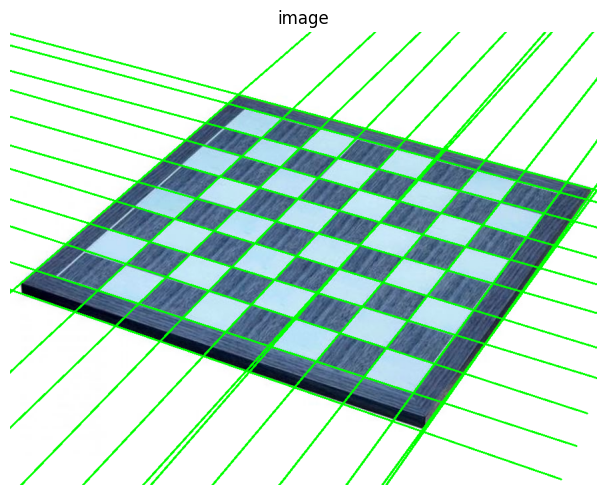

In [10]:
for line in lines:
    rho , theta = line[0]


    a = np.cos(theta)
    b= np.sin(theta)

    x0 = rho *a
    y0 = rho* b

    x1 = int(x0 + 1000 * (-b))
    y1= int(y0 + 1000 * (a))

    x2 = int(x0 - 1000 * (-b))
    y2= int(y0 - 1000 * (a))


    cv.line(org_img, (x1,y1),(x2,y2),(0,255,0),2)

image_plot(org_img)

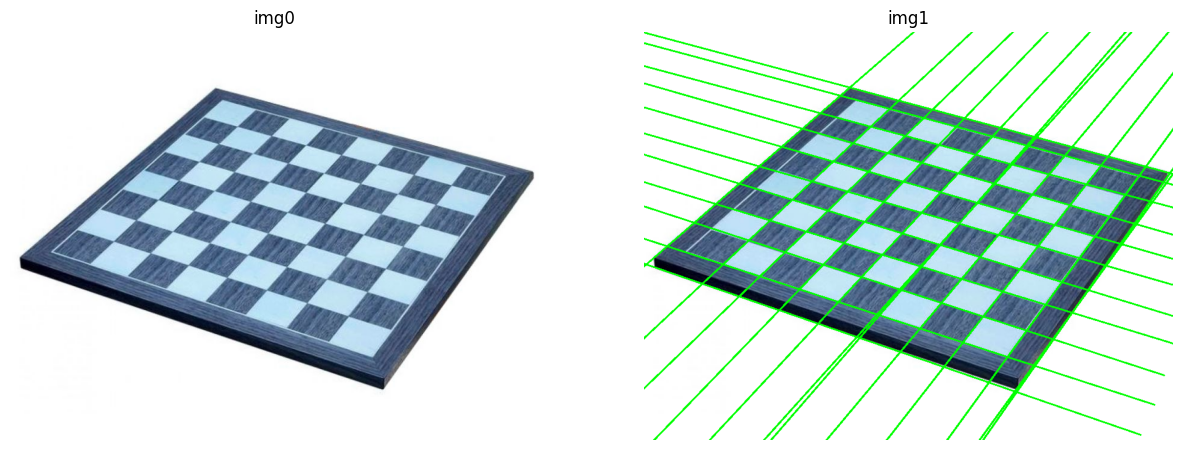

In [11]:
show_multiple_img(1,2, (org_img_main, org_img))

# Exercise 3

## Import image

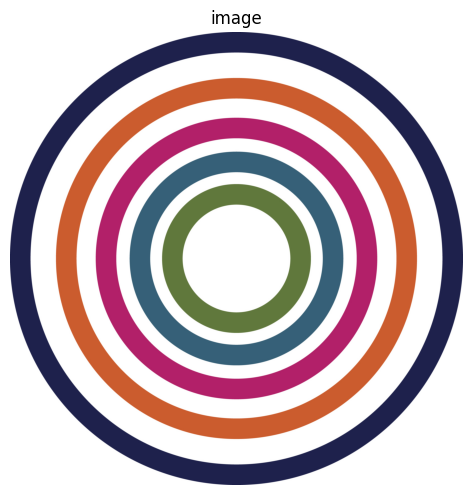

In [12]:
circle_img = cv.imread('./media/b.jpg',cv.IMREAD_UNCHANGED)


# Plot color image
img3 = cv.cvtColor(circle_img,cv.COLOR_BGR2RGB)
image_plot(img3,c_map = 'gray')

### Denoising

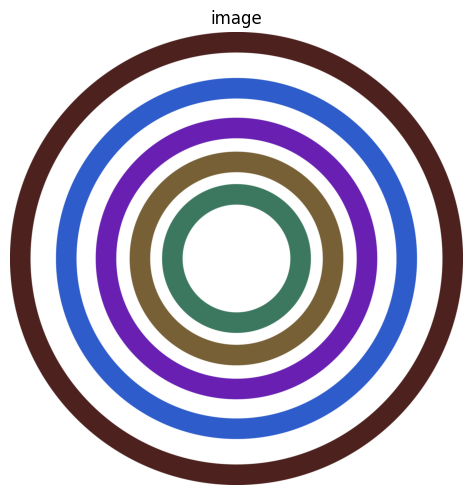

In [13]:
circle_img_denoised = cv.medianBlur(circle_img,5)
image_plot(circle_img_denoised)

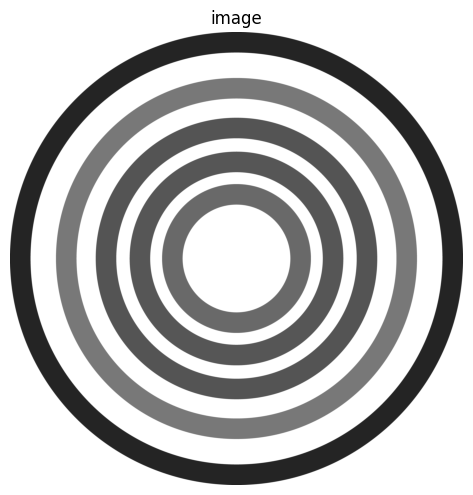

In [14]:
# gray image
gray_circle = cv.cvtColor(circle_img_denoised , cv.COLOR_BGR2GRAY)
image_plot(gray_circle)

### Using Circle Hough Transform

In [15]:
circle = cv.HoughCircles(gray_circle,cv.HOUGH_GRADIENT
                         ,1, 20
                         ,param1=50,param2=20,minRadius= 100, maxRadius=250)


In [16]:
circle

array([[[1156.5, 1201.5,  249.4],
        [1201.5, 1204.5,  249.4],
        [1154.5, 1158.5,  247.2],
        [1207.5, 1156.5,  245. ],
        [1216.5, 1218.5,  229.1]]], dtype=float32)

In [17]:
circle.shape

(1, 5, 3)

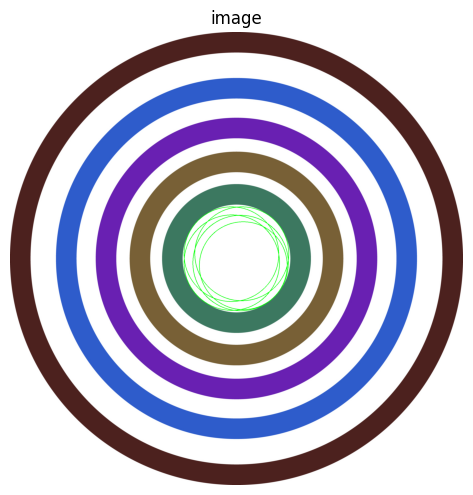

In [18]:
circles = np.round(circle[0,:]).astype('int')

for (x , y , r) in circles:
    cv.circle(circle_img, (x,y) , r , (0,255,0), 2)

image_plot(circle_img)


### As you can see, in spite of changing all the parameters, I could not get a fine result.

### Using Contour

In [19]:
ret , thresh_circle = cv.threshold(gray_circle,200,255,cv.THRESH_BINARY)
contours, hierachy= cv.findContours(thresh_circle, cv.RETR_TREE,cv.CHAIN_APPROX_NONE)
print(contours)

(array([[[2361, 1232]],

       [[2361, 1233]],

       [[2361, 1234]],

       ...,

       [[2361, 1235]],

       [[2361, 1234]],

       [[2361, 1233]]], dtype=int32), array([[[   0, 1232]],

       [[   0, 1233]],

       [[   0, 1234]],

       ...,

       [[   0, 1235]],

       [[   0, 1234]],

       [[   0, 1233]]], dtype=int32), array([[[1156,  107]],

       [[1155,  108]],

       [[1154,  108]],

       ...,

       [[1159,  107]],

       [[1158,  107]],

       [[1157,  107]]], dtype=int32), array([[[1138,  240]],

       [[1139,  239]],

       [[1140,  239]],

       ...,

       [[1135,  240]],

       [[1136,  240]],

       [[1137,  240]]], dtype=int32), array([[[1151,  347]],

       [[1150,  348]],

       [[1149,  348]],

       ...,

       [[1154,  347]],

       [[1153,  347]],

       [[1152,  347]]], dtype=int32), array([[[1149,  447]],

       [[1150,  446]],

       [[1151,  446]],

       ...,

       [[1146,  447]],

       [[1147,  447]],

       [[11

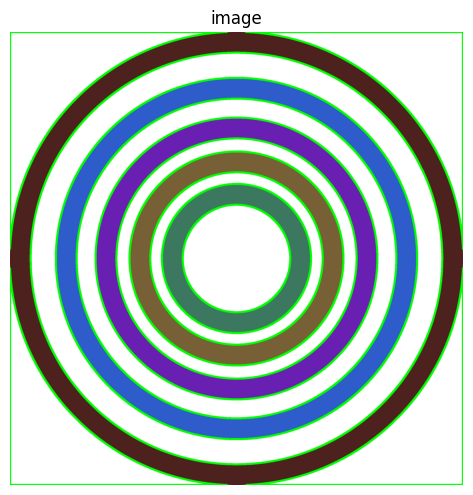

In [20]:
iimg = cv.imread('./media/b.jpg',cv.IMREAD_UNCHANGED)
img_new = cv.drawContours(iimg,contours,-1,(0,255,0),10)

image_plot(img_new)

### The problem is solved

# Exercise 4

### Getting 8th frame of video and saving it

In [21]:

import os
  
cam = cv.VideoCapture('./media/lane.mp4')
  
# frame
currentframe = 0
  
while(currentframe != 9):
      
    # reading from frame
    ret,frame = cam.read()
    # print(currentframe)
    if currentframe == 8:
     
        name = './media/frame' + str(currentframe) + '.jpg'
        print ('Creating...' + name)
        # print(currentframe)
     
        cv.imwrite(name, frame)
        
    currentframe += 1
cam.release()
cv.destroyAllWindows()

Creating..../media/frame8.jpg


#### Read the saved frame

In [22]:
img_frame = cv.imread('./media/frame8.jpg',cv.IMREAD_UNCHANGED)

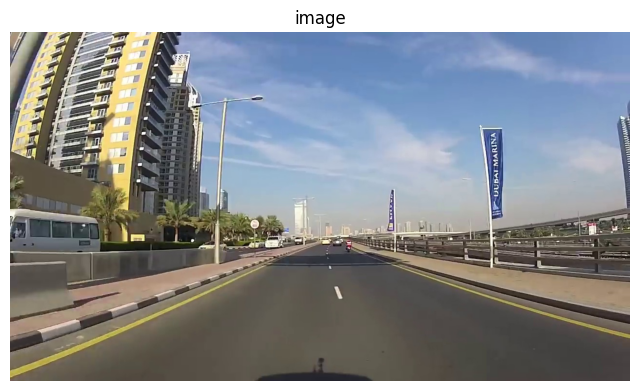

In [23]:
img_frame_color = cv.cvtColor(img_frame,cv.COLOR_BGR2RGB)

img_frame_color_con = img_frame_color.copy()
image_plot(img_frame_color)

### Denoising through Gaussian

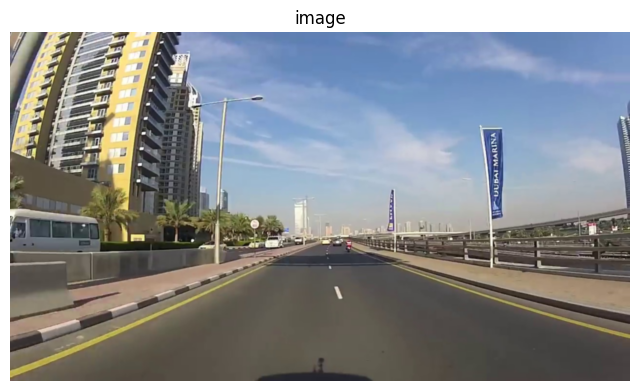

In [24]:
img_frame_denoised_G = cv.GaussianBlur(img_frame_color,(3,3),0)
img_frame_gray = cv.cvtColor(img_frame_denoised_G,cv.COLOR_RGB2GRAY)
image_plot(img_frame_denoised_G)

In [25]:
threshold = 150
ret, img_frame_thresh = cv.threshold(img_frame_gray,threshold,255, cv.THRESH_BINARY)

### Edge detection with Canny

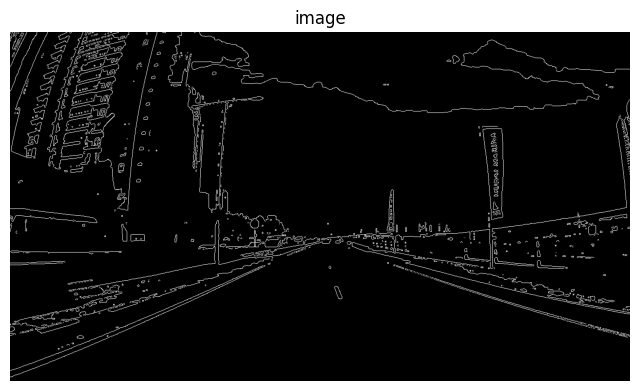

In [26]:
# edge detection

img_frame_edge = cv.Canny(img_frame_thresh,threshold1= 150,threshold2=200)

image_plot(img_frame_edge)

### Using Hough Transform

In [27]:
lines = cv.HoughLines(img_frame_edge,1,np.pi/180,190)

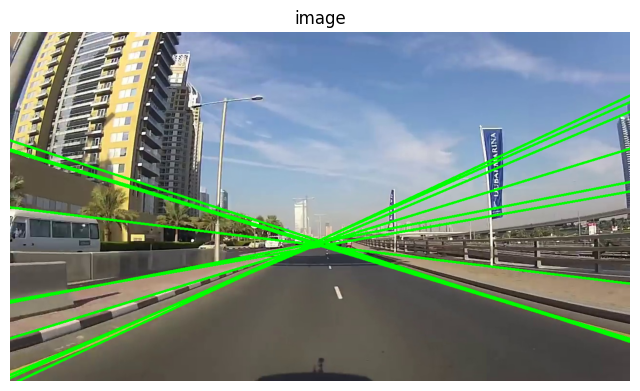

In [28]:
for line in lines:
    rho , theta = line[0]


    a = np.cos(theta)
    b= np.sin(theta)

    x0 = rho *a
    y0 = rho* b

    x1 = int(x0 + 1500 * (-b))
    y1= int(y0 + 1500 * (a))

    x2 = int(x0 - 1500 * (-b))
    y2= int(y0 - 1500 * (a))


    cv.line(img_frame_color, (x1,y1),(x2,y2),(0,255,0),3)

image_plot(img_frame_color)

### Using Contours

In [29]:
ret , thresh = cv.threshold(img_frame_gray,200,255,cv.THRESH_BINARY)

con,hier = cv.findContours(thresh, cv.RETR_TREE,cv.CHAIN_APPROX_NONE)

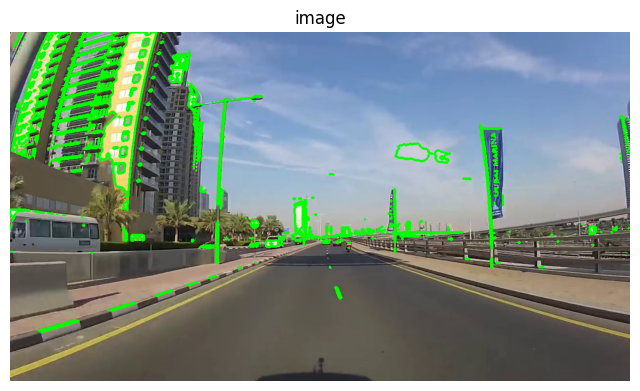

In [30]:
img_con = cv.drawContours(img_frame_color_con,con, -1, (0,255,0),3)
image_plot(img_con)

### Transform image to HSV space and try to find yelow lines

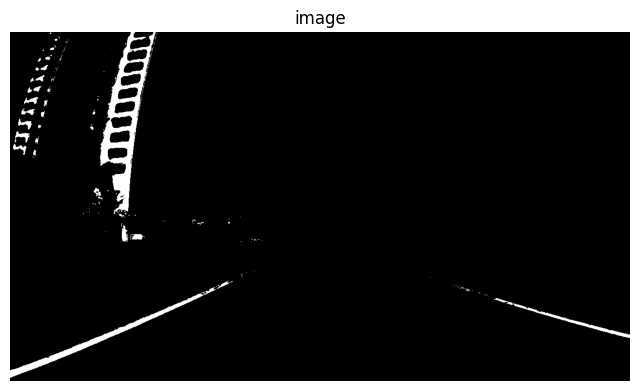

In [31]:
## using HSV

hsv_frame_denoised = cv.cvtColor(img_frame_denoised_G,cv.COLOR_RGB2HSV)
min_yellow = np.array([18,94,140])
max_yellow = np.array([48,255,255])

mask = cv.inRange(hsv_frame_denoised,min_yellow,max_yellow)

image_plot(mask)

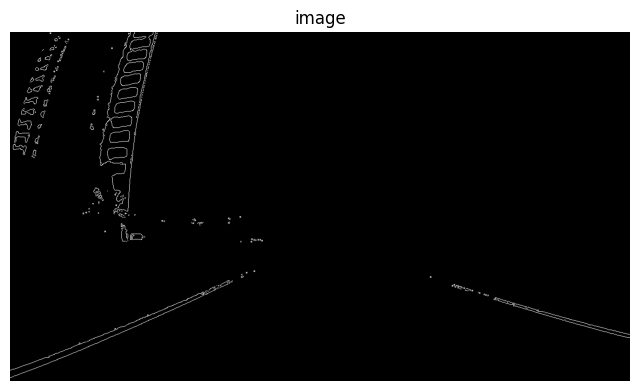

In [32]:
hsv_frame_edge = cv.Canny(mask,100,200)

image_plot(hsv_frame_edge)

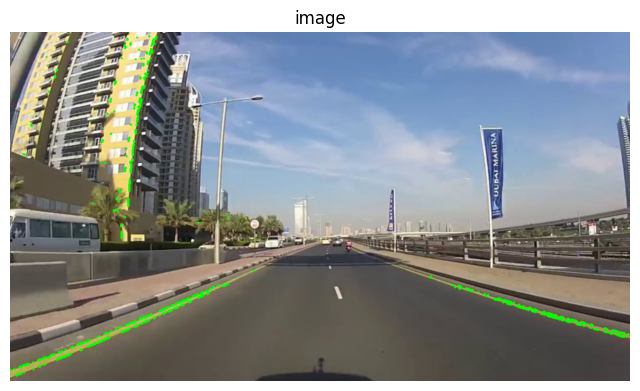

In [33]:
lines = cv.HoughLinesP(hsv_frame_edge,1, np.pi/180,50)


if lines is not None:
    for line in lines:
        x1 , y1, x2, y2 = line[0]

        cv.line(img_frame_denoised_G, (x1,y1), (x2,y2), (0,255,0),4)



image_plot(img_frame_denoised_G)